In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import random
import csv
import io
nltk.download('punkt')
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import train_test_split
nltk.download('stopwords')
from itertools import chain

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
url = 'https://github.com/gupta-leader/gupta_mashiaah/raw/master/BBB.csv'
data = pd.read_csv(url)
data.head(10)

,Topic,Paragraph
0,A Monument for Peace,"In December, 1864, the Civil War was nearly ov..."
1,The Brooklyn Bridge,Have you ever seen a picture of the Brooklyn B...
2,Pluto: The Planet That Wasn't,Poor Pluto!\n\nIt’s bad enough to be the runt ...
3,When Television Became Colorful,"Today, nearly all television programs are broa..."
4,An Unlikely Parasite: The Mistletoe,"During the holidays, many people hang mistleto..."
5,Predicting the Future,"Garry Golden sits in a small cafe in Brooklyn,..."
6,Benjamin Franklin: The Ultimate Solution Creator,Benjamin Franklin is credited with an array of...
7,Alexander Graham Bel,"Alexander Graham Bell was in his laboratory, w..."
8,Louis Braille,Have you ever noticed when you step into an el...
9,The Origins of the Internet,All of the men were nervous as they waited. Bu...


In [ ]:
data=data.fillna(0)

In [ ]:
def remove_stop_punct_from_paragrapghs(par):
  tokenizer = RegexpTokenizer(r'\w+')
  tokens = tokenizer.tokenize(str(par).lower())
  stop_words = set(stopwords.words('english'))
  tokens = [w for w in tokens if not w in stop_words]
  new_par= tokens
  return new_par

In [ ]:
def remove_stop_from_questions(que):
  tokenizer = RegexpTokenizer(r'\w+')
  tokens = tokenizer.tokenize(str(que).lower())
  stop_words = set(stopwords.words('english'))
  tokens = [w for w in tokens if w in word_corpus if not w in stop_words]
  new_que = tokens
  return new_que


In [ ]:
def Create_Paragraph_Topic_list(data):
  temp=[]
  row_data=[]
  for i in range(data.shape[0]):
    for j in tokenize.sent_tokenize(data['Paragraph'][i]):
      temp.append((j,data['Paragraph'][i],data['Topic'][i]))
  temp
  for ele in temp:
    if ele[0]!=0:
      row_data.append(ele)
  return row_data
row_data = Create_Paragraph_Topic_list(data)

In [ ]:
def Creat_X(data):
  C=Create_Paragraph_Topic_list(data)
  sentence_list=[]
  for i in range((len(C))):
    sentence_list.append(remove_stop_from_questions(C[i][0]))
  return sentence_list


In [ ]:
def Creat_Y(data):
  row_data = Create_Paragraph_Topic_list(data)
  paragraph_list=[]
  for i in range((len(row_data))):
    paragraph_list.append(remove_stop_punct_from_paragrapghs(row_data[i][1]))
  return paragraph_list


In [ ]:
def creat_word_corpus(data):
  par=Creat_Y(data)
  #word_corpus=creat_word_corpus(par)
  word_corpus= np.unique(np.array(list(chain.from_iterable(par))))
  return word_corpus
word_corpus=creat_word_corpus(data)

In [ ]:
X = Creat_X(data)
Y = Creat_Y(data)


In [ ]:
def gen_voc(w):
  voc = {ch:i for i ,ch in enumerate(w)}
  return voc
voc =gen_voc(word_corpus)

In [ ]:
def multi_hot_encode(sequences, dimension):
  results=np.zeros((len(sequences), dimension))
  for i in range(len(sequences)):
    for j in sequences[i]:
      results[i][voc[j]]=1
  return results

In [ ]:
x = multi_hot_encode(X, word_corpus.shape[0])
y = multi_hot_encode(Y, word_corpus.shape[0])

In [ ]:
dict1={}
for i in range(y.shape[0]):
  dict1.update( {row_data[i][2] :y[i]} )


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc =DecisionTreeClassifier()
dtc.fit(x, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
def quen_test(Q,dict1):
  q=np.array([Q])
  q=q.reshape(1,-1)
  q=remove_stop_from_questions(q)
  q_test =  multi_hot_encode([q], word_corpus.shape[0])
  ans= dtc.predict(q_test)
  for key , value in dict1.items():
    if (value==ans).all():
      break
  return key

In [ ]:
Q='what type of tv companies would sell'
quen_test(Q,dict1)

'When Television Became Colorful'

In [33]:
url = 'https://github.com/gupta-leader/gupta_mashiaah/raw/master/questions.csv'
question = pd.read_csv(url)
question.head()

,Questions,A,B,C,D,Answer
0,What type of TV companies would sell?,Good Quality,Low resolution,Flicker picture,Less responsive,A
1,What was the cost of the original statue in 1...,"$15,000","$10,000","$20,000","$30,000",D
2,In which year Mrs. James E. Caldwell and her g...,1814,1714,1914,1924,C
3,What Scientists made new rules and decide to ...,Only Pluto qualified,Only Eris qualified,Both Pluto and Eris qualified,neither Pluto nor Eris qualified,D
4,When it is unusual to find any television show...,past decades,Today,In 1992,None of the above,B


In [34]:
from google.colab import files
uploaded = files.upload()

Saving data1.txt to data1.txt


In [75]:
file2= open("data1.txt","r")
import re
que_lis = file2.read()
re.split('; |, |\*|\n',que_lis)
convert_que = list(que_lis.split(","))
count=len(convert_que)/6;
count1=0
while(count>0):
  add_lis = []
  for i in range(count1,count1+6):
    add_lis.append(convert_que[i])
  cols= ["Questions","A","B","C","D","Answer"]
  count=count-1;
  count1=count1+6;
  new_df = pd.DataFrame([add_lis],columns=cols)
  question = pd.concat([question,new_df],ignore_index=True)


In [ ]:
def update_flag(sugst_list,s_value):
  B = list(sugst_list.items())
  C=sorted(B,key=lambda x: x[1], reverse=False)
  simp=[]
  for i in range(s_value):
    simp.append(C[i][0])
  return simp

In [ ]:
def Start_Quiz(number_of_questions=10,s_value=2,mpq=1,negmark=0.25):
  right_que = 0
  wrong_que = 0
  count_que = 1
  nn = number_of_questions
  l=[]
  t_name=[]
  s = (list(np.linspace(0,(question.shape[0]-1),question.shape[0],endpoint=True,dtype=int)))
  
  sugst_list = {ch:0 for i ,ch in enumerate(data['Topic'])}
  while(number_of_questions>0):
    simplicity =update_flag(sugst_list,s_value)
    random.shuffle(s)
    if quen_test(question['Questions'][s[0]],dict1) not in simplicity:
      print('\n')
      print('\n')
      print(count_que,':',question['Questions'][s[0]],'\n','a)',question['A'][s[0]],'\n','b)',question['B'][s[0]],'\n','c)',question['C'][s[0]],'\n','d)',question['D'][s[0]],'\n','*FOR SKIP PRESS ENTER')
      print('\n')
      ans = input("Make your choice : ")
      
      
      if ans.upper() == question['Answer'][s[0]]:
          print("Correct!! \U0001F44D")
          Y_predict = quen_test(question['Questions'][s[0]],dict1)
          l.append((Y_predict,1))
          t_name.append(Y_predict)
          sugst_list[Y_predict] = sugst_list[Y_predict]+1
          right_que+=1
      elif ans.upper() =="":
        Y_predict = quen_test(question['Questions'][s[0]],dict1)
        t_name.append(Y_predict)  
        
        
      else:
          print(" Your answer is Incorrect!! \U0001F44E	 ",'\n',"Correct option is:",question['Answer'][s[0]].lower()) 
          Y_predict = quen_test(question['Questions'][s[0]],dict1)
          l.append((Y_predict,0))
          t_name.append(Y_predict)
          sugst_list[Y_predict] = sugst_list[Y_predict]-1
          wrong_que+=1
        
      
        
        
      number_of_questions=number_of_questions-1
      s.remove(s[0])
      count_que+=1
      
    else:
      random.shuffle(s) 
          
  u_list=list(set(t_name))
  l_wrong=[]
  for i in range(len(l)):
    if l[i][1]==0:
      l_wrong.append(l[i][0])
  l_right=[]
  for i in range(len(l)):
    if l[i][1]==1:
      l_right.append(l[i][0])
  std_list=[]
  for i in range(len(l)):
      std_list.append((l[i][0],l_right.count(l[i][0]),l_wrong.count(l[i][0])))
  p =list(set(std_list))
  res = []
  only_prob=[]
  topic_pie=[]
  for i in range(len(p)):
    res.append((p[i][0],round(p[i][1]*100/(p[i][1]+p[i][2]),2)))
    only_prob.append((p[i][0],round(p[i][1]*100/(p[i][1]+p[i][2]),2)))
    topic_pie.append((p[i][0],round((p[i][1]+p[i][2])*100/nn,2)))
  summary=pd.DataFrame(res,columns=['Topic', 'Percent(Right)'])
  summary1=pd.DataFrame(topic_pie,columns=['Topic', 'Percent(que)'])
  #print(summary)
  revise_again=sorted(only_prob,key=lambda x: x[1])
  #only_prob=np.sort(only_prob)
  #print(revise_again)
  score_f = (right_que-wrong_que*negmark)*mpq
 
  
  return summary , right_que, wrong_que ,score_f,nn,revise_again,summary1
#summary , right_que, wrong_que ,score_f,nn,revise_again= Start_Quiz(5)

In [ ]:
summary , right_que, wrong_que ,score_f,nn,revise_again,summary1= Start_Quiz(20)





1 : What was the profession of Louis Brailles's Father? 
 a) Doctor 
 b) A leather worker 
 c) Buisness man 
 d) Carpenter 
 *FOR SKIP PRESS ENTER


Make your choice : a
 Your answer is Incorrect!! 👎	  
 Correct option is: b




2 : What Scientists made new rules  and decide to do for planet? 
 a) Only Pluto qualified 
 b) Only Eris qualified 
 c) Both Pluto and Eris qualified 
 d) neither Pluto nor Eris qualified 
 *FOR SKIP PRESS ENTER


Make your choice : a
 Your answer is Incorrect!! 👎	  
 Correct option is: d




3 : What is this passage "Benjamin Franklin: The Ultimate Solution Creator" mainly about? 
 a) the U.S. patent system 
 b) the invention of the lightning rod 
 c) population growth in the American colonies 
 d) Benjamin Franklin and his many inventions 
 *FOR SKIP PRESS ENTER


Make your choice : a
 Your answer is Incorrect!! 👎	  
 Correct option is: d




4 : Who were excited by Bell’s idea to invent a device that transmitted multiple signals over a single wire? 
 a)


------------------------Score---------------------------
Number of right question :  5
Number of wrong question :  14
     Your Total score is :  7.5 %
You need to highly revise again :-> When Television Became Colorful
You need to highly revise again :-> Pluto: The Planet That Wasn't
You need to highly revise again :-> An Unlikely Parasite: The Mistletoe
You need to highly revise again :-> Benjamin Franklin: The Ultimate Solution Creator
---------------FINAL SUMMARY--------------------


,Topic,Percent(Right)
0,The Brooklyn Bridge,50.00
1,When Television Became Colorful,0.00
2,Pluto: The Planet That Wasn't,0.00
3,An Unlikely Parasite: The Mistletoe,0.00
4,Louis Braille,33.33
5,Alexander Graham Bel,40.00
6,A Monument for Peace,33.33
7,Benjamin Franklin: The Ultimate Solution Creator,0.00


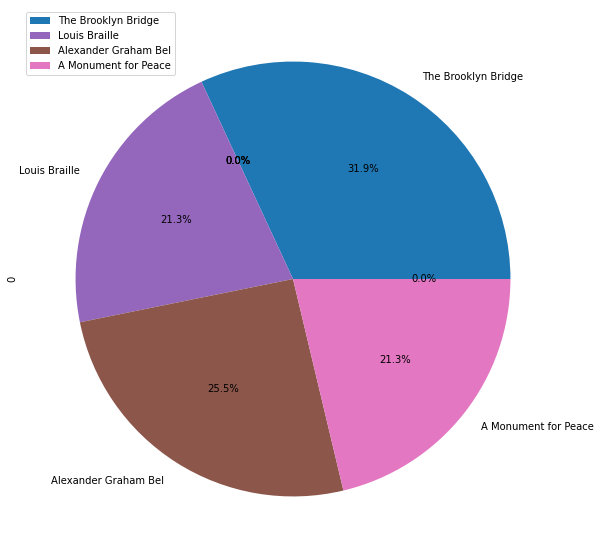

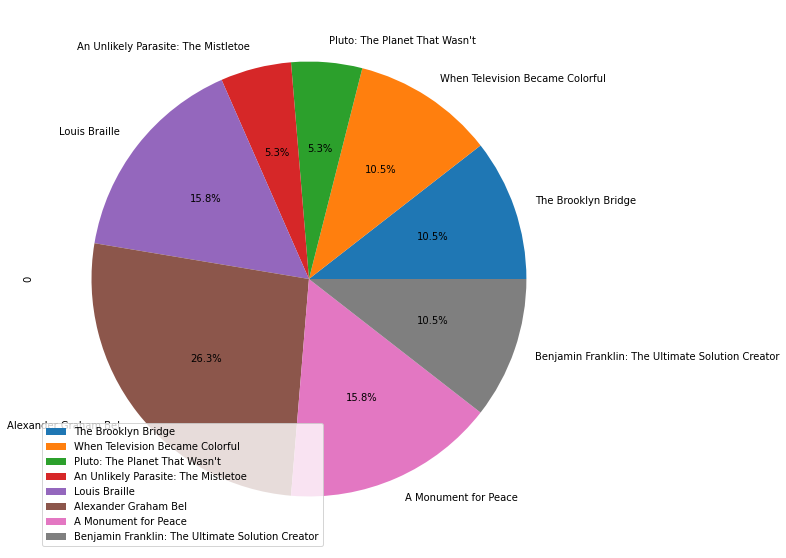

In [ ]:
def Score(summary , right_que, wrong_que ,score_f,nn,revise_again,summary1):
  print()
  print('------------------------Score---------------------------')
  print("Number of right question : ",right_que)
  print("Number of wrong question : ",wrong_que)
  print("     Your Total score is : ",round((score_f*100)/nn,2),'%')
  freq=0
  for i in range(len(revise_again)):
    if(revise_again[i][1]==100):
      break;
    elif(revise_again[i][1]==0):
      freq=1;
      print("You need to highly revise again :->",revise_again[i][0])
    elif(revise_again[i][1]>0 and revise_again[i][1]<100 and freq==0):
      print("You need to highly revise again :->",revise_again[i][0])
      break;
#  if(revise_again[i-1][1]!=100):
#    print("And also focus on :->",revise_again[i-1][0])
  print('---------------FINAL SUMMARY--------------------')
  
  df = pd.DataFrame(list(np.array(summary['Percent(Right)'])), index=list(np.array(summary['Topic'])))
  df.plot(kind='pie',autopct='%1.1f%%',subplots=True, figsize=(10, 10))
  df1 = pd.DataFrame(list(np.array(summary1['Percent(que)'])), index=list(np.array(summary1['Topic'])))
  df1.plot(kind='pie',autopct='%1.1f%%',subplots=True, figsize=(10, 10))

  return summary
Score(summary , right_que, wrong_que ,score_f,nn,revise_again,summary1)